Read the Seabird CTD profiles written as CVN files.

In [17]:
import os
import glob
import logging
import numpy as np
import matplotlib.pyplot as plt
from seabird.cnv import fCNV

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [5]:
datadir = "/home/ctroupin/Data/Stareso/CTD/"
#datadir = '/home/ctroupin/Data/Stareso/CTD/201705/'
datafilelist = sorted(glob.glob(os.path.join(datadir, "*.cnv")))
logging.info("Working on {0} files".format(len(datafilelist)))

INFO:root:Working on 1 files


In [74]:
class CNVprofile(object):
    """Profile object storing the profiles obtained from cnv files
    
    """
    
    def __init__(self, filename, varlist=None, values=None):
        self.filename = filename
        if varlist==None:
            self.varlist = []
        if values==None:
            self.values = {}
            
    def read_from_file(self):
        """Read the variable names and the values from the specified file
        """
        
        self.varlist = ['depth', 'salinity', 'temperature', 
                        'conductivity', 'density', 'flag']
        nvars = len(self.varlist)
        
        # Initialise variable dictionnary
        for i in range(0, nvars):
            self.values[self.varlist[i]] = []
        
        with open(self.filename, 'r', encoding='latin-1') as f:
            # Read first line
            line = f.readline()

            # Read until end of header (could add regex at some point)
            while not line.rstrip() == "*END*":
                line = f.readline()
            logger.debug(line)


            """
            # Read the column names
            line = f.readline()
            logger.debug(line)
            columnnames = line.rsplit()
            logger.debug("Column names: {0}".format(columnnames))
            """
            line = f.readline()
            while line:
                data = line.rsplit()
                for i in range(0, nvars):
                    self.values[self.varlist[i]].append(float(data[i]))
                    line = f.readline()

In [76]:
P = CNVprofile(datafilelist[0])
P.read_from_file()
P.values['depth']

DEBUG:root:*END*



[1.0,
 7.0,
 13.0,
 19.0,
 25.0,
 31.0,
 37.0,
 43.0,
 49.0,
 55.0,
 61.0,
 67.0,
 73.0,
 79.0,
 85.0,
 91.0,
 97.0,
 103.0,
 109.0,
 115.0,
 121.0,
 127.0,
 133.0,
 139.0,
 145.0,
 151.0,
 157.0,
 163.0,
 169.0,
 175.0,
 181.0,
 187.0,
 193.0,
 199.0,
 205.0,
 211.0,
 217.0,
 223.0,
 229.0,
 235.0,
 241.0,
 247.0,
 253.0,
 259.0,
 265.0,
 271.0,
 277.0,
 283.0,
 289.0,
 295.0,
 301.0,
 307.0,
 313.0,
 319.0,
 325.0,
 331.0,
 337.0,
 343.0,
 349.0,
 355.0,
 361.0,
 367.0,
 373.0,
 379.0,
 385.0,
 391.0,
 397.0,
 403.0,
 409.0,
 415.0,
 421.0,
 427.0,
 433.0,
 439.0,
 445.0,
 451.0,
 457.0]

## Select downcast

In [27]:
depth = np.ma.masked_less(depth, 0, copy=True)
indmax = np.argmax(depth)

# Make the plot

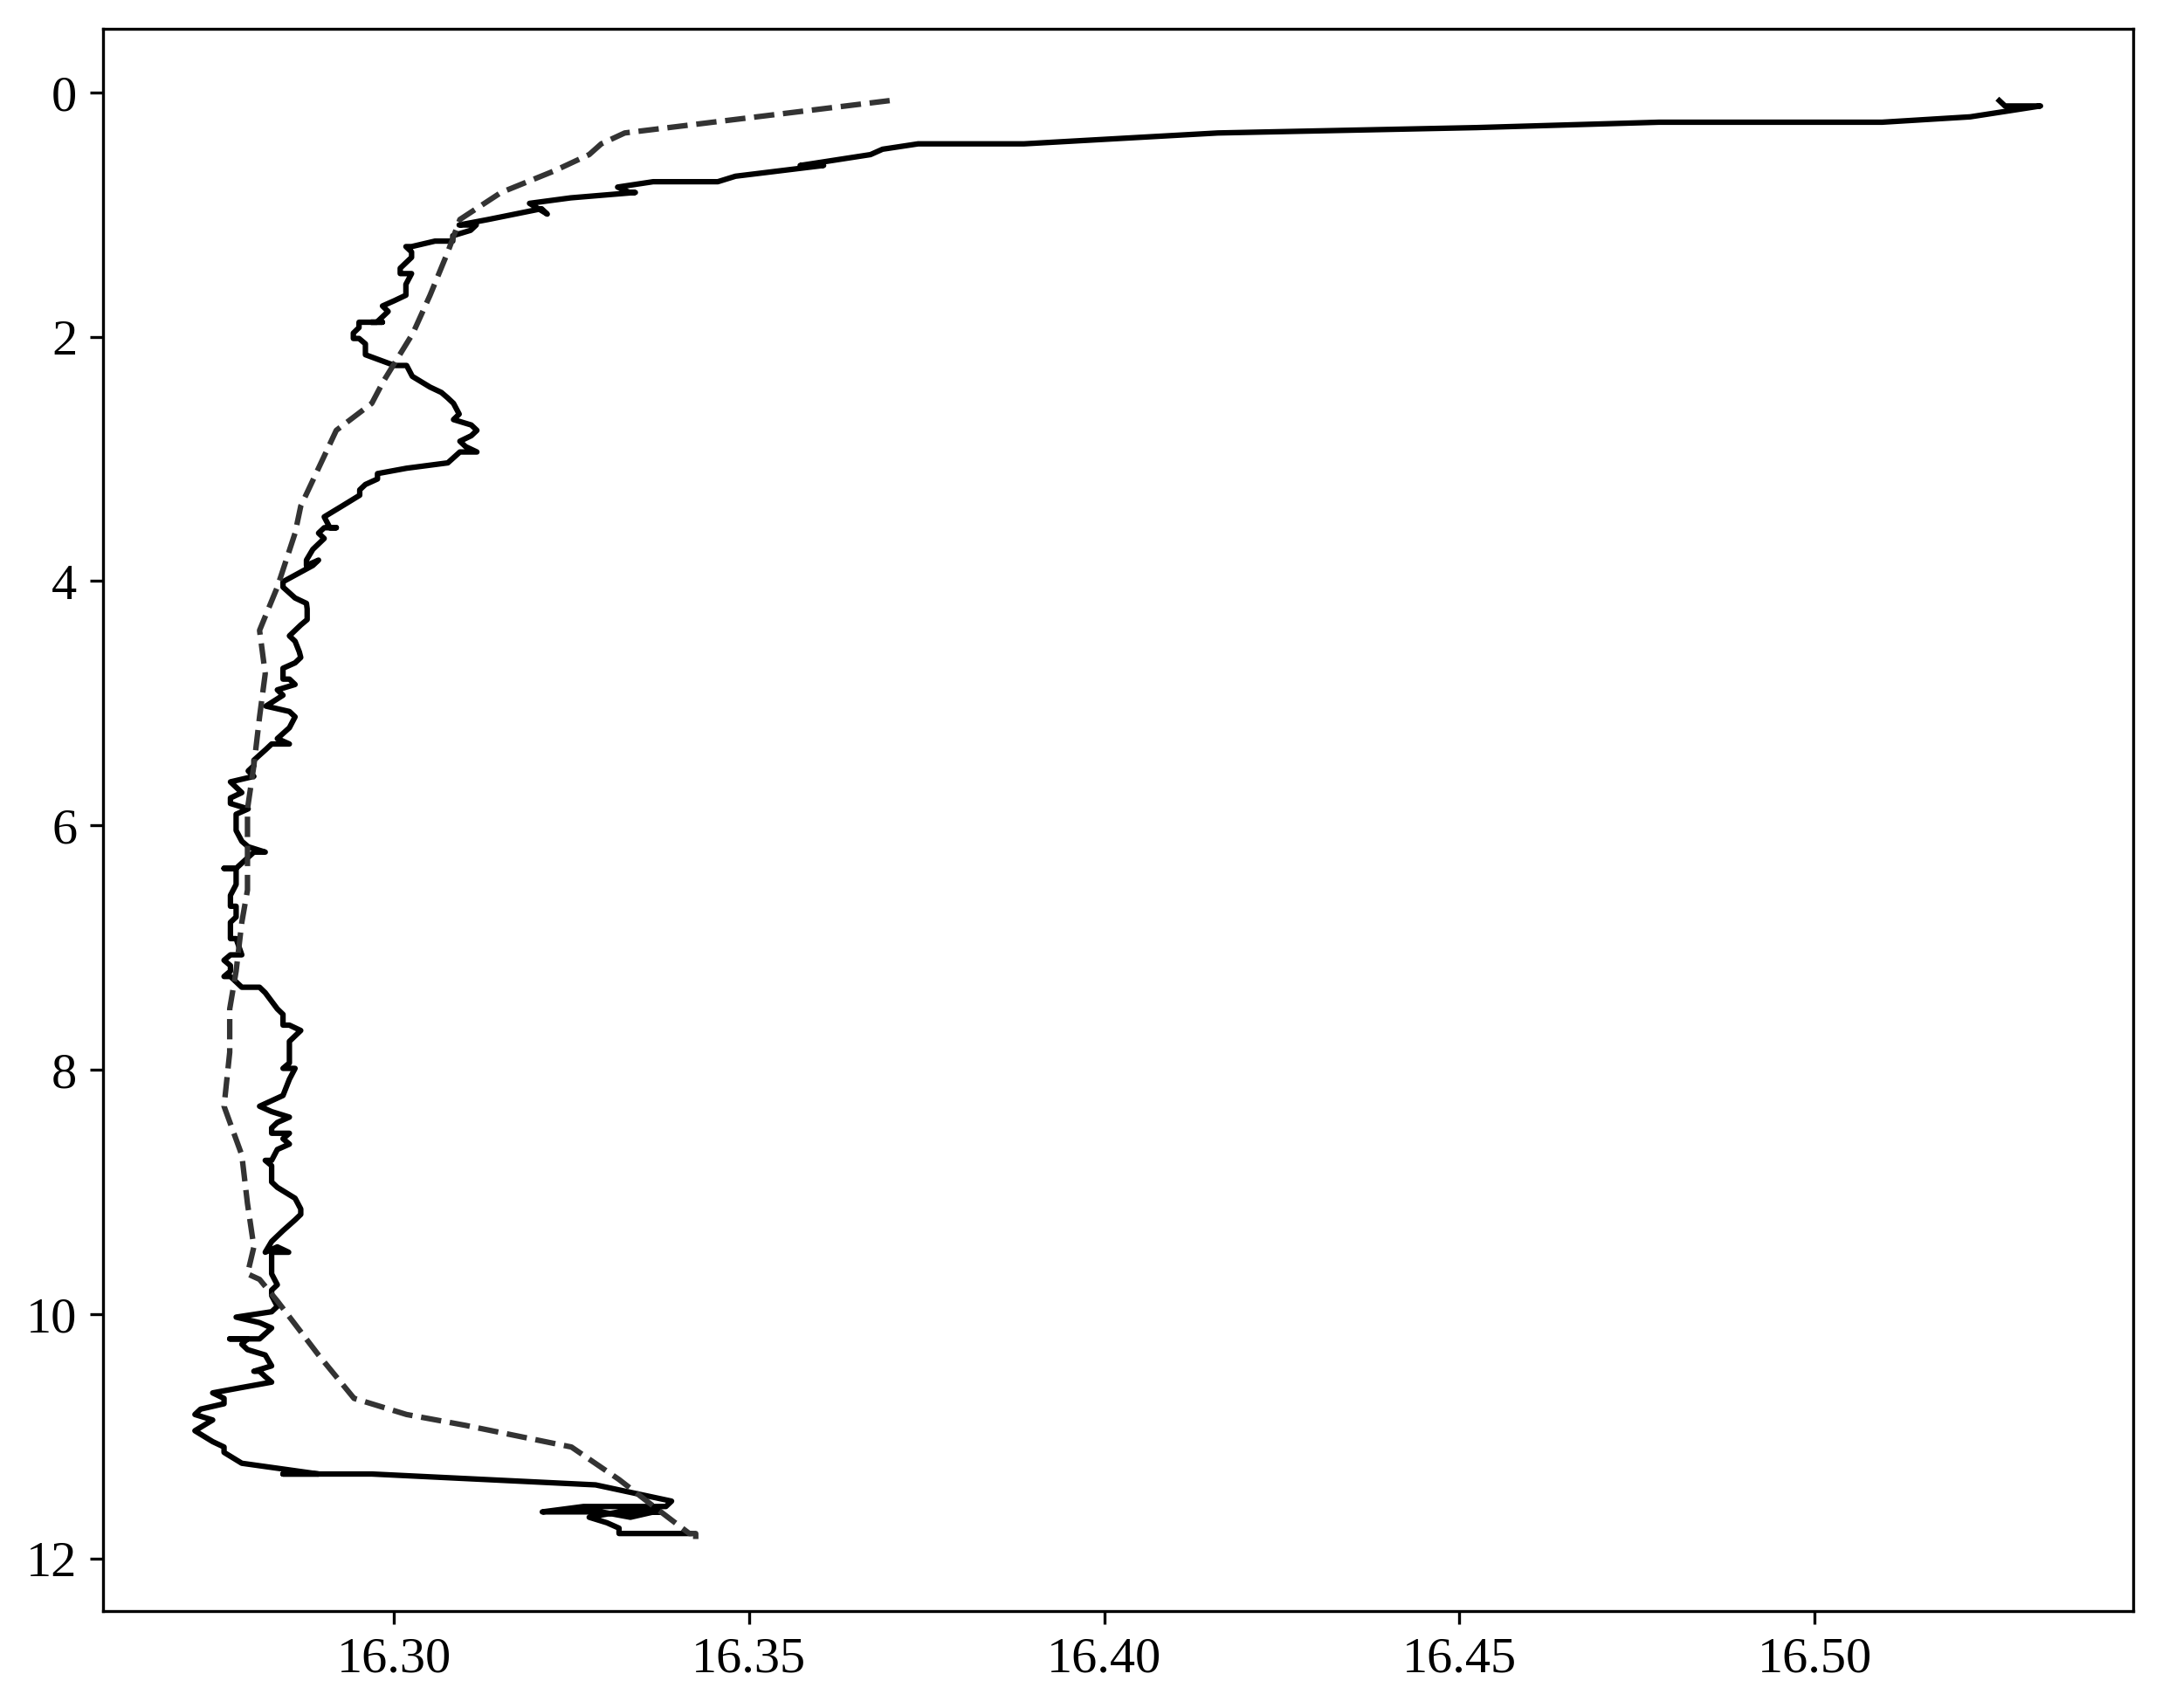

In [33]:
fig = plt.figure()
plt.plot(temperature[:indmax], depth[:indmax], 'k')
plt.plot(temperature[indmax:], depth[indmax:], '--', color='.2')
plt.gca().invert_yaxis()
plt.show()
plt.close()